# Paper Plots
This notebook is used to collect some of the code used to produce the plots particularly for the analysis note.

In [ ]:
import os, sys, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import hist
from hist import Hist
import pickle
import mplhep as hep
import math
from tabulate import tabulate
import itertools
import warnings
import json
from plot_utils import *

warnings.filterwarnings('ignore')
hep.style.use("CMS")
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams['figure.facecolor'] = 'white'

## Notebook Parameters
The following couple cells define the input and output directories, and load in the desired .pkl files into the `plots` nested dictionary.<br>
`output_label`: _str_, saves plots as `<output_label>+<plot_name>.<file_ext>`.<br>
`file_ext`: _str_, see above.<br>

In [2]:
# parameters
output_label = '/home/submit/lavezzo/public_html/SUEP/analysis/paper_plots/'
file_ext = '.pdf'

The `plots` dictionary is used to store all the plots imported from the pickle files. Dimensions: (sample) x (plot label) <br>
The `loader` function in `plot_utils.py` automatically merges all the QCD HT and QCD pT bins into one sample ('QCD_HT' and 'QCD_Pt'), applies the lumis, and excludes some of the low QCD bins.<br>

In [3]:
# create output dir
if not os.path.isdir(output_label): 
    print("Creating", output_label)
    os.mkdir(output_label)

# This part is meant to be flxeible, depending on what you want to import
# dimensions: (sample) x (plot label)

# input .pkl files
plotDir = '/work/submit/{}/SUEP/outputs/'.format(os.environ['USER'])
infile_names = glob.glob(plotDir+'*.pkl')

# scout_files = [f for f in infile_names if "scout_trackSels.pkl" in f]
# plots_scout = loader(scout_files)

offline_files = [f for f in infile_names if "deltaR2.pkl" in f]
plots = loader(offline_files)

# put everything in one dictionary
# for key in plots_scout.keys(): plots[key+"_scout"] = plots_scout[key]

These are all the samples loaded.

In [4]:
keys = list(plots.keys())
keys.sort()
for k in keys: print(k)

1000to1500
100to200
1500to2000
2000toInf
200to300
300to500
500to700
QCD_HT
SUEP-m1000-darkPho
SUEP-m1000-darkPhoHad
SUEP-m1000-generic
SUEP-m125-darkPho
SUEP-m125-darkPhoHad
SUEP-m125-generic
SUEP-m125-generic-htcut
SUEP-m400-darkPho
SUEP-m400-darkPhoHad
SUEP-m400-generic
SUEP-m750-darkPho
SUEP-m750-darkPhoHad
SUEP-m750-generic
data


## Extended ABCD

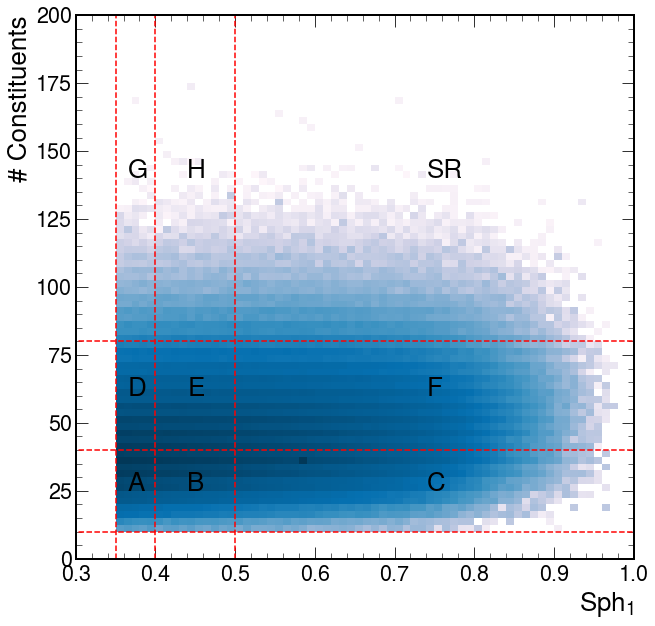

In [38]:
plot_label = '2D_SUEP_S1_SUEP_nconst_CL'
samples = ['QCD_HT']
#samples += ['SUEP-m125-generic', 'SUEP-m400-generic', 'SUEP-m750-generic', 'SUEP-m1000-generic']
draw_lines = True
lines_x = [0.35,0.4, 0.5, 1.0]
lines_y = [10,40,80, 200]

k = 0
regions = ['A','B','C','D','E','F','G','H','SR']
for i in range(len(lines_y)-1):
    for j in range(len(lines_x)-1):
        xloc = (lines_x[j+1] + lines_x[j])/2 - 0.01
        yloc = (lines_y[i+1] + lines_y[i])/2
        plt.text(xloc, yloc, regions[k])
        k+=1

for sample in samples:
    
    if plots[sample][plot_label].sum().value == 0:
        print("Histogram empty for sample", sample)
        continue
        
    h = plots[sample][plot_label]
    h = h[:,10j:]

    hep.hist2dplot(h, 
               norm=matplotlib.colors.LogNorm(),
               cmap = 'PuBu',
               cbar=False,
               label=sample) 
    
    # draw lines to visualize ABCD regions
    if draw_lines:
        for y in lines_y: plt.plot([0,10000], [y,y], color='red', linestyle='dashed')
        for x in lines_x: plt.plot([x,x], [0,1000], color='red', linestyle='dashed')
    
    plt.ylim(0,200)
    plt.xlim(0.3,1.0)
    plt.savefig('extendedABCD-regions.pdf')
    plt.show()